# Machine Learning Project (Churn Prediction Bank)

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.

# 0. Load Data and Install Packages

In [1]:
# Import packages 
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import xgboost as xgb

from scipy.stats.mstats import winsorize
from scipy.stats import randint

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score, make_scorer
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import the Customer-Churn-Records.csv file
data = pd.read_csv('Customer-Churn-Records.csv')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


# 1. Exploratory Data Analysis

In [3]:
# We have 10,000 rows and 18 columns
data.shape

(10000, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
# Check for missing values 
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# Check the number of unique values in each column 
data.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [7]:
# Descriptive statistics of the numeric variables
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


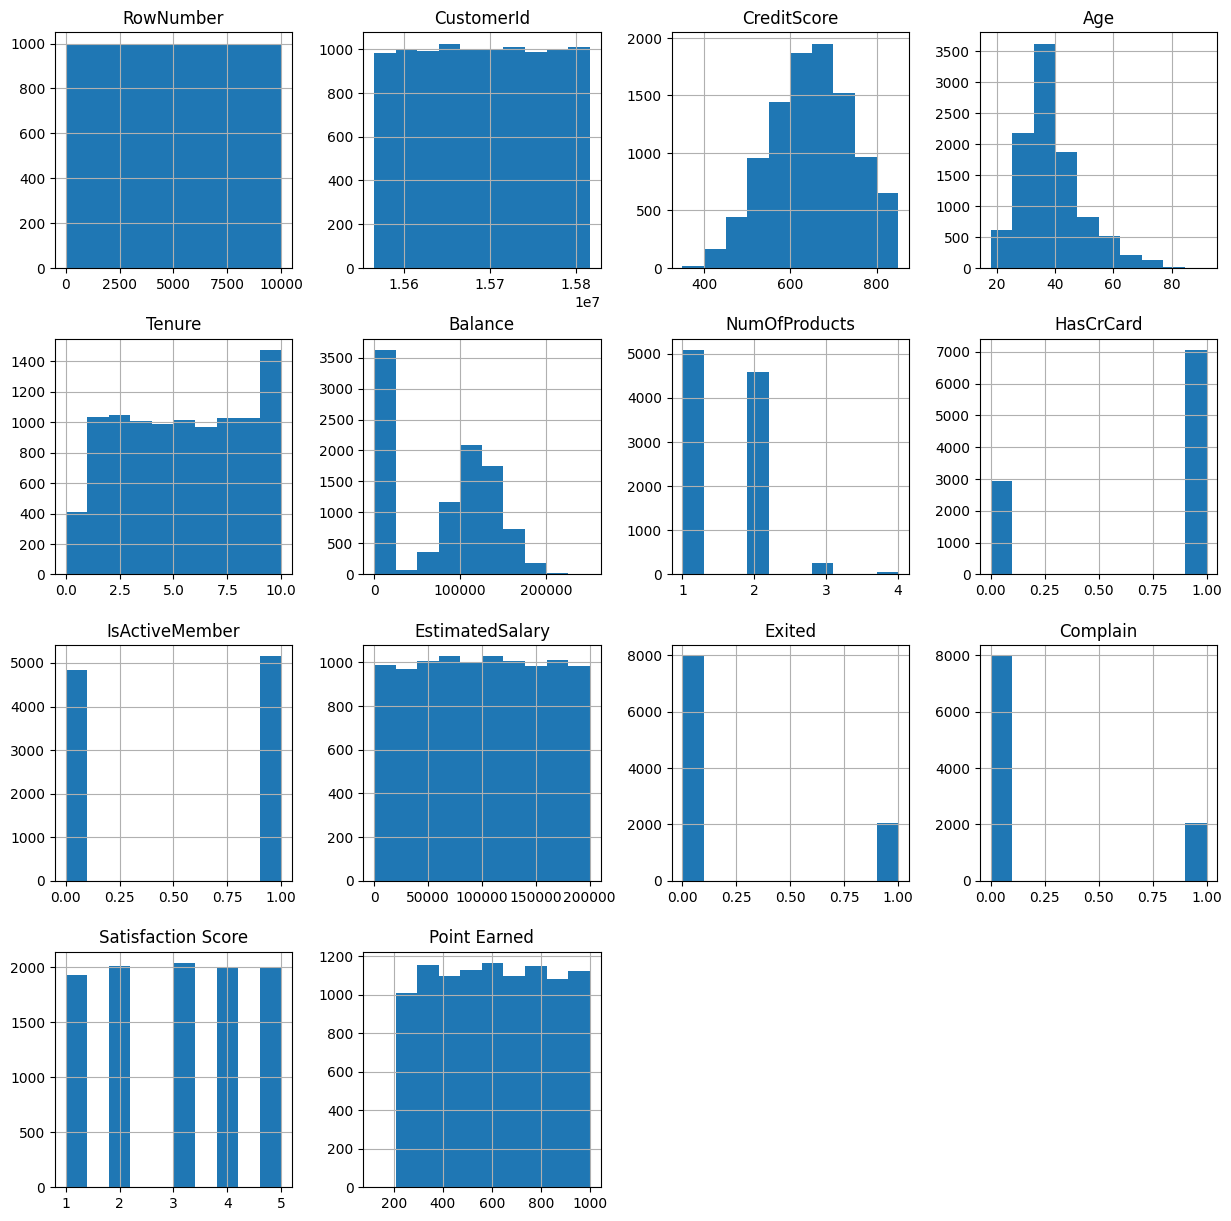

In [8]:
# Plot histograms of all columns with 'floats' and 'integers'
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.hist(figsize=(15,15))
plt.show()

**Preliminary Findings on Numerical Columns:**
- **Drop Columns**: *'RowNumber´'* is only an index and *'CustomerId'* is clearly not useful for the model.*'Complaints'* could potentially compromise the model's relevance, since the goal is to antecipate churn before customer express dissatisfaction and relying on these indicators for churn prediction is clearly reactive, instead of proactive. 
- **Target Variable**: 'Exited'(binary: 0 (retained), 1(churned).
- **Categorical Variables**: 'NumOfProducts', 'HasCrCard','IsActiveMember' and 'Satisfaction Score'

In [9]:
data.rename(columns={'Point Earned': 'Point_Earned'}, inplace=True)
#data.head(4)

In [10]:
# Check counts of unique values of 'object' columns (except 'Surname')
for col in data.select_dtypes(include='object').columns:
    if col != 'Surname':
        display(pd.DataFrame(data[col].value_counts()))

,count
Geography,
France,5014
Germany,2509
Spain,2477


,count
Gender,
Male,5457
Female,4543


,count
Card Type,
DIAMOND,2507
GOLD,2502
SILVER,2496
PLATINUM,2495


**Preliminary Findings on Categorical Columns:**
- *'Surname'* column is clearly not useful for the model and thus, it shall be dropped.
- *'Geography'*: Half of customers are from 'France'.
- *'Gender'*: More Males than Females.
- *'Card Type'*: A variable well distributed across categories

In [11]:
# List of 'categorical' and 'numerical' variables
cat_var = ['Geography', 'Gender', 'Card Type', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score']
num_var=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point_Earned','Exited']

## 1.1 Relationship of Feautures with Target ('Exited')

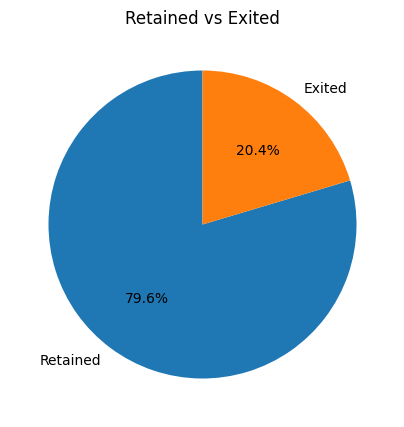

In [12]:
# Count the occurrences of each class in the 'Exited' variable
exit_counts = data['Exited'].value_counts()
# Replace labels for better interpretation
labels = ['Retained', 'Exited']
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(exit_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Retained vs Exited')
plt.show()

**Imbalanced Dataset**: 'Retained customers' (0s) are more dominant and thus,the dataset is imbalanced.

### 1.1.1 Categorical Feautures and Target

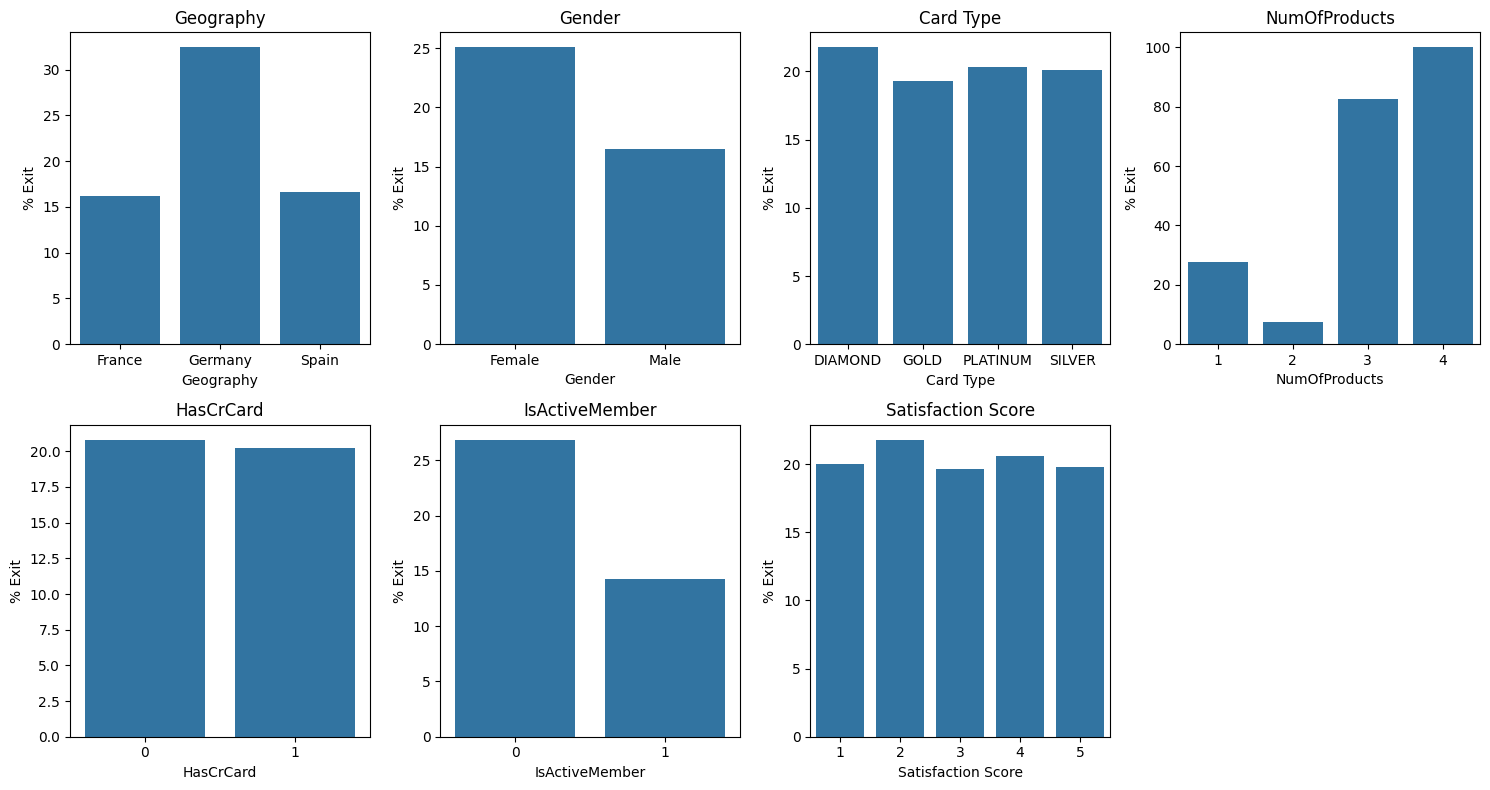

In [13]:
# Calculate the number of rows and columns needed for subplots
num_plots = len(cat_var)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1

# Create a grid of subplots
fig, axarr = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Iterate through categorical variables and calculate exit rate per category
for i, var in enumerate(cat_var):
    perc_exit = data.groupby(var)['Exited'].mean() * 100
    
    row_index = i // num_cols  # Calculate the row index
    col_index = i % num_cols   # Calculate the column index
    ax = axarr[row_index, col_index]
    
    sns.barplot(x=perc_exit.index, y=perc_exit.values, ax=ax)
    
    ax.set_xlabel(var)
    ax.set_ylabel('% Exit')
    ax.set_title(var)

# Hide empty subplots (last one)
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axarr.flatten()[i])

plt.tight_layout()
plt.show()

**Target ('Exited') and Categorical Variables:**
- 'Geography': German clients are more likely to exit.
- 'Gender': Female customers are more likely to exit.
- 'NumOfProducts':Customer who purchased more than 2 products are more likely to churn.
- 'HasCrCard':Contrasting with the information above, this variable does not impact churn.
- 'Is Active Member': Active members are less likely to exit.
- 'Card Type':DIAMOND clients are a slighlty more likely to churn
- 'Satisfaction Score': Clients who scored complaint resolution =2 are slightly more likely to churn.

### 1.1.2 Numerical Feautures and Target

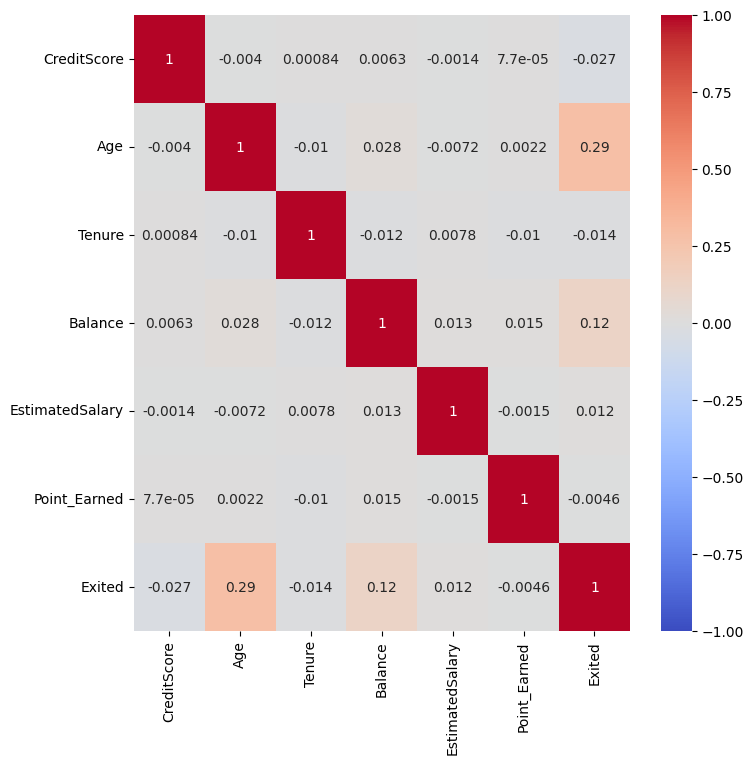

In [14]:
# Correlation analysis in numerical variables (not analysed before)
corr = data[num_var].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            cmap='coolwarm',
            annot=True)
plt.show()

**Target ('Exited') and Numerical Variables:**
- The variables *'Age'* and *'Balance'* correlations (in absolute terms) with *'Exited'* are the closest to 1, which indicates predictive potential.
- The other variables have weak correlations and most of them are negative (except for EstimatedSalary', which is positive).

In [15]:
# Bivariate plots for all combinations/pairs of numerical variables (to understand their relationships)
# The 'hue' parameter is set to 'Exited', which means the plot will differentiate data points based on the 'Exited' variable
#sns.pairplot(data[num_var], hue='Exited')

<Axes: xlabel='Exited', ylabel='Point_Earned'>

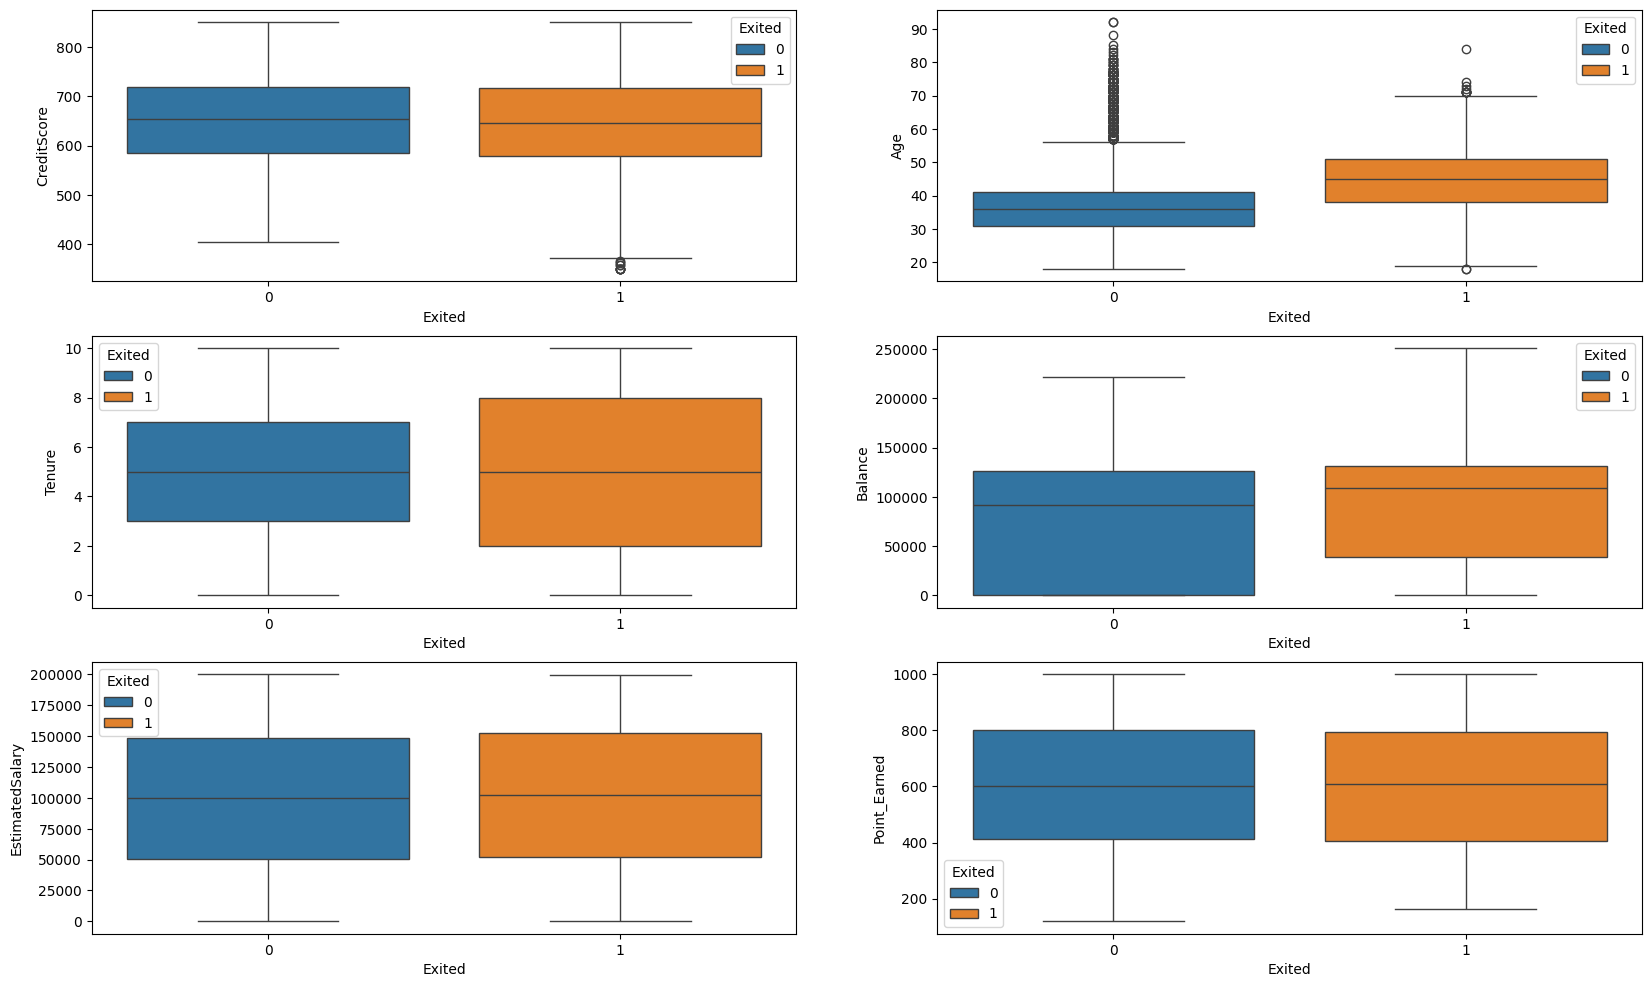

In [16]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='Point_Earned',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

## 1.2 Outliers Detection

In [17]:
num_var=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point_Earned']

for col in num_var:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f'Outliers in {col}: {outliers.shape[0]}')

Outliers in CreditScore: 15
Outliers in Age: 359
Outliers in Tenure: 0
Outliers in Balance: 0
Outliers in EstimatedSalary: 0
Outliers in Point_Earned: 0


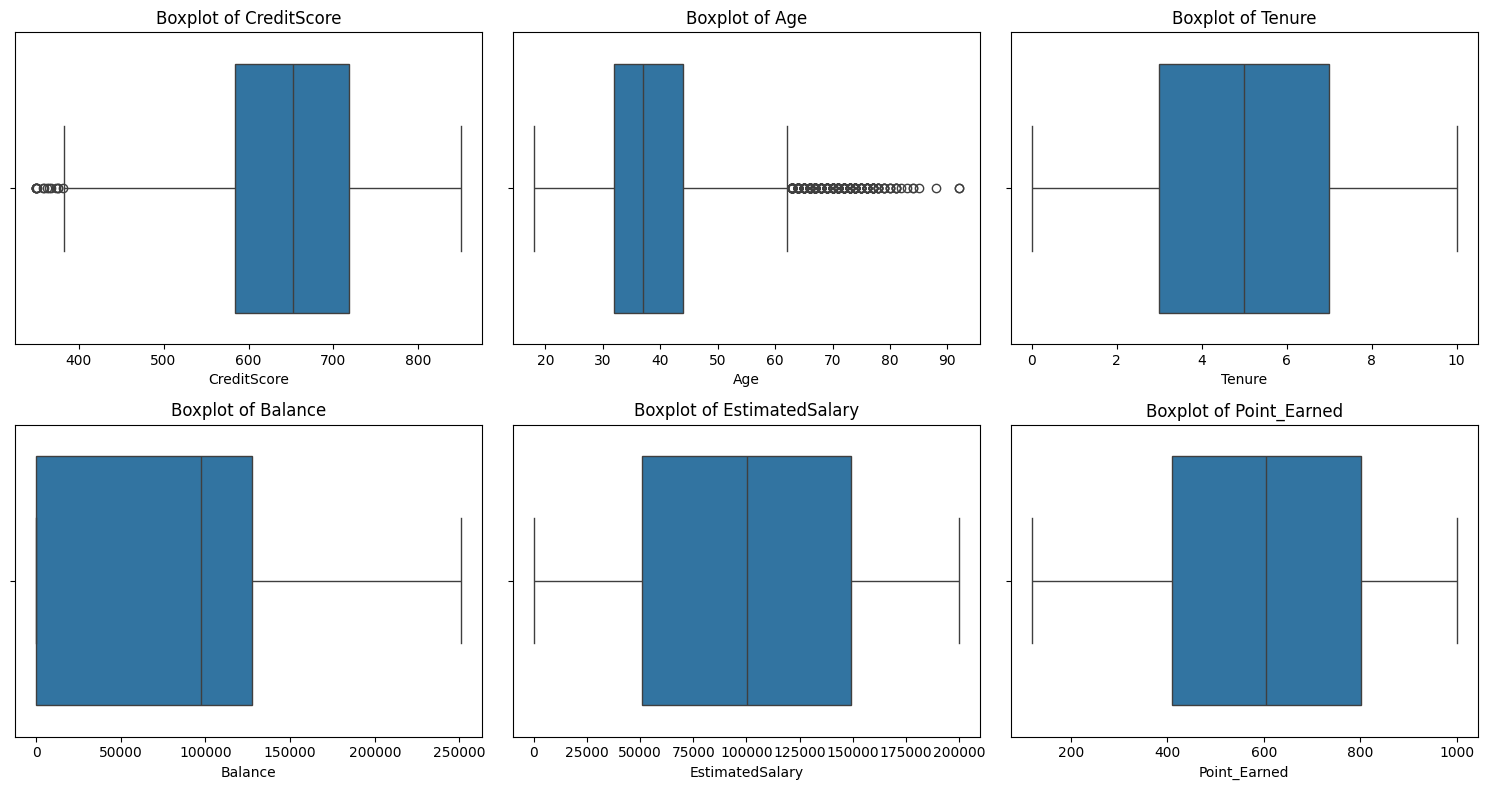

In [18]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_var, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# 2.Feauture Engineering

In [19]:
# Credit Score 'outliers' are clients with low credit score and thus, it makes sense to apply 'winsorizing' method:
# Winsorizing: cap the extreme values by replacing values below the 5th perc. with the 5th perc. and values above the 95th perc. with the 95th perc.
data['CreditScore'] = winsorize(data['CreditScore'], limits=[0.05, 0.05])

#Age 'outliers' are clients aged above 60 years and thus, we will aplly the 'binning' method:
#Binning: Convert age into categorical bins to handle the 'outliers'
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 25, 33, 41, 49, 56, 65, np.inf], labels=['18-24', '25-32', '33-40', '41-48', '49-56', '56-64', '65+'])
print(data['AgeGroup'].value_counts())

AgeGroup
33-40    3553
25-32    2621
41-48    1820
49-56     665
18-24     589
56-64     466
65+       264
Name: count, dtype: int64


In [20]:
#Eventough balance as not outliers, there are many clients with zero balance, thus it makes sense to create a binary column 'Balance_Binary'
data ['Balance_Binary']=data ['Balance'].where(data['Balance']== 0,1)

In [21]:
data['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [22]:
# Since there are few clients with number of products > 2, let's join 3 and 4 in one class
# Assuming 'data' is your DataFrame
data['NumOfProducts'] = data['NumOfProducts'].astype(str)
data['NumOfProducts'] = data['NumOfProducts'].replace({'3': '3+', '4': '3+'})
data['NumOfProducts'].value_counts()

NumOfProducts
1     5084
2     4590
3+     326
Name: count, dtype: int64

# 3. Data Preprocessing

In [23]:
# Drop columns Row Number, CustomerID, Surname, Complain, and 'Age' (because we know have 'Age Group')
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Complain','Age'], axis=1)

In [24]:
# Turn 'Gender' into a binary variable 
data['Gender'] = data['Gender'].replace({'Male':0,'Female': 1})
#data.head(4)

In [25]:
#!pip install category_encoders

# One-Hot Encoding for 'Geography' and 'AgeGroup'
ohencoder = ce.OneHotEncoder(cols=["Geography","AgeGroup"], use_cat_names=True)
data = ohencoder.fit_transform(data)

In [26]:
# Ordinal Encoding for 'Card Type', 'NumOfProducts'
# Mapping the ordinal values for 'Card Type'
ordencoder = ce.ordinal.OrdinalEncoder(
    cols=["Card Type", "NumOfProducts"],  # Specifying the columns to encode
    mapping=[
        {
            "col": "Card Type",
            "mapping": {
                'SILVER': 0,
                'GOLD': 1,
                'PLATINUM': 2,
                'DIAMOND': 3,
            }
        },
        {
            "col": "NumOfProducts",
            "mapping": {
                '1': 0,
                '2': 1,
                '3+': 2,
            }
        }
    ]
)
data = ordencoder.fit_transform(data)
data.head(5)

,CreditScore,Geography_France,Geography_Spain,Geography_Germany,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Point_Earned,AgeGroup_18-24,AgeGroup_25-32,AgeGroup_33-40,AgeGroup_41-48,AgeGroup_49-56,AgeGroup_56-64,AgeGroup_65+,AgeGroup_nan,Balance_Binary
0,619,1,0,0,1,2,0.00,0,1,1,...,464,0,0,0,1,0,0,0,0,0.0
1,608,0,1,0,1,1,83807.86,0,0,1,...,456,0,0,1,0,0,0,0,0,1.0
2,502,1,0,0,1,8,159660.80,2,1,0,...,377,0,0,0,1,0,0,0,0,1.0
3,699,1,0,0,1,1,0.00,1,0,0,...,350,0,0,1,0,0,0,0,0,0.0
4,812,0,1,0,1,2,125510.82,0,1,1,...,425,0,0,0,1,0,0,0,0,1.0


In [27]:
#Confirm if everything is numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography_France    10000 non-null  int64  
 2   Geography_Spain     10000 non-null  int64  
 3   Geography_Germany   10000 non-null  int64  
 4   Gender              10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int32  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int32  
 14  Point_Earned        10000 non-null  int64  
 15  AgeGroup_18-24      10000 non-null  int64  
 16  AgeGr

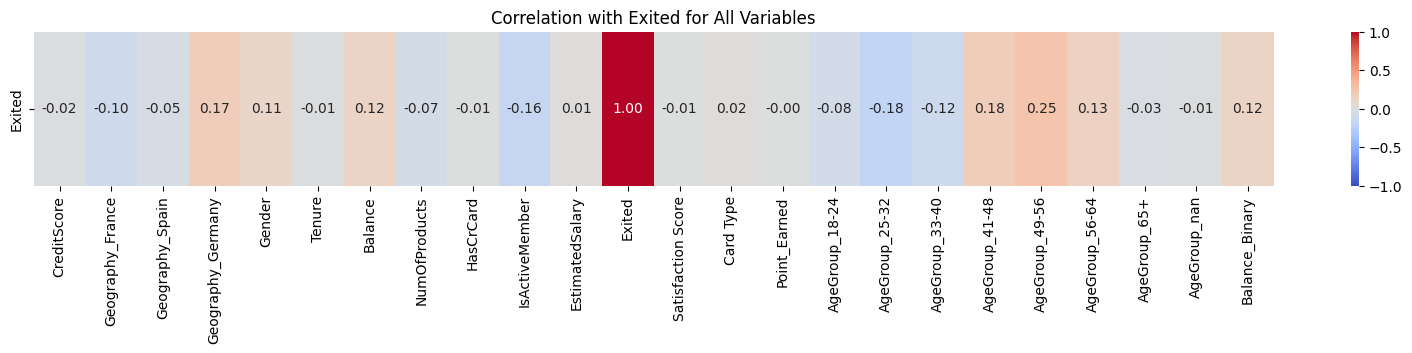

In [28]:
# Plot the correlation heatmap for 'Exited' with all variables
plt.figure(figsize=(20, 2))
sns.heatmap(data.corr()['Exited'].to_frame().transpose(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 10})
plt.title('Correlation with Exited for All Variables')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Exited')
y = data['Exited']

# 4. Handling Imbalanced Dataset

In [30]:
# Use BorderlineSMOTE to oversample the minority class in the dataset
X_res,y_res=BorderlineSMOTE().fit_resample(X,y)
y_res.value_counts()

Exited
1    7962
0    7962
Name: count, dtype: int64

# 5 . Validation techniques

In [31]:
# Split the resampled data into training and testing sets
# The train_size parameter specifies the proportion of the dataset to include in the train split
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.2,random_state=42)

# 6. Classification Models (Train and Evaluate)

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMax Scaler
scaler = MinMaxScaler()

# Fit and transform scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [41]:
# Define a function to train and evaluate each model with various metrics (AUROC, accuracy, precision, recall anf f1 score)
def train_and_evaluate_auroc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    # Predictions on training set
    train_preds = model.predict(X_train)
    # Predictions on test set
    test_preds = model.predict(X_test)
    
    # Calculate AUROC for training set
    auroc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    # Calculate AUROC for test set
    auroc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Calculate other metrics
    accuracy_train = accuracy_score(y_train, train_preds)
    accuracy_test = accuracy_score(y_test, test_preds)
    precision_train = precision_score(y_train, train_preds)
    precision_test = precision_score(y_test, test_preds)
    recall_train = recall_score(y_train, train_preds)
    recall_test = recall_score(y_test, test_preds)
    f1_train = f1_score(y_train, train_preds)
    f1_test = f1_score(y_test, test_preds)
    
    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, auroc_train, auroc_test

# Initialize models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

## 6.1. Check Metrics

In [42]:
#!pip install --upgrade xgboost
# Train and evaluate each model 
acc_log_reg_train, acc_log_reg_test, prec_log_reg_train, prec_log_reg_test, \
rec_log_reg_train, rec_log_reg_test, f1_log_reg_train, f1_log_reg_test, \
auroc_log_reg_train, auroc_log_reg_test = train_and_evaluate_auroc(lr, X_train_scaled, y_train, X_test_scaled, y_test)

acc_rf_train, acc_rf_test, prec_rf_train, prec_rf_test, \
rec_rf_train, rec_rf_test, f1_rf_train, f1_rf_test, \
auroc_rf_train, auroc_rf_test = train_and_evaluate_auroc(rf, X_train_scaled, y_train, X_test_scaled, y_test)

acc_gbc_train, acc_gbc_test, prec_gbc_train, prec_gbc_test, \
rec_gbc_train, rec_gbc_test, f1_gbc_train, f1_gbc_test, \
auroc_gbc_train, auroc_gbc_test = train_and_evaluate_auroc(gbc, X_train_scaled, y_train, X_test_scaled, y_test)

acc_xgb_train, acc_xgb_test, prec_xgb_train, prec_xgb_test, \
rec_xgb_train, rec_xgb_test, f1_xgb_train, f1_xgb_test, \
auroc_xgb_train, auroc_xgb_test = train_and_evaluate_auroc(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

acc_knn_train, acc_knn_test, prec_knn_train, prec_knn_test, \
rec_knn_train, rec_knn_test, f1_knn_train, f1_knn_test, \
auroc_knn_train, auroc_knn_test = train_and_evaluate_auroc(knn, X_train_scaled, y_train, X_test_scaled, y_test)

acc_dt_train, acc_dt_test, prec_dt_train, prec_dt_test, \
rec_dt_train, rec_dt_test, f1_dt_train, f1_dt_test, \
auroc_dt_train, auroc_dt_test = train_and_evaluate_auroc(dt, X_train_scaled, y_train, X_test_scaled, y_test)

# Create a DataFrame with model names and corresponding scores
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBoostClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'TrainAccuracy': [acc_log_reg_train, acc_rf_train, acc_gbc_train, acc_xgb_train, acc_knn_train, acc_dt_train],
    'TestAccuracy': [acc_log_reg_test, acc_rf_test, acc_gbc_test, acc_xgb_test, acc_knn_test, acc_dt_test],
    'TrainPrecision': [prec_log_reg_train, prec_rf_train, prec_gbc_train, prec_xgb_train, prec_knn_train, prec_dt_train],
    'TestPrecision': [prec_log_reg_test, prec_rf_test, prec_gbc_test, prec_xgb_test, prec_knn_test, prec_dt_test],
    'TrainRecall': [rec_log_reg_train, rec_rf_train, rec_gbc_train, rec_xgb_train, rec_knn_train, rec_dt_train],
    'TestRecall': [rec_log_reg_test, rec_rf_test, rec_gbc_test, rec_xgb_test, rec_knn_test, rec_dt_test],
    'TrainF1': [f1_log_reg_train, f1_rf_train, f1_gbc_train, f1_xgb_train, f1_knn_train, f1_dt_train],
    'TestF1': [f1_log_reg_test, f1_rf_test, f1_gbc_test, f1_xgb_test, f1_knn_test, f1_dt_test],
    'TrainAUROC': [auroc_log_reg_train, auroc_rf_train, auroc_gbc_train, auroc_xgb_train, auroc_knn_train, auroc_dt_train],
    'TestAUROC': [auroc_log_reg_test, auroc_rf_test, auroc_gbc_test, auroc_xgb_test, auroc_knn_test, auroc_dt_test],
})

# Sort the DataFrame by TestAccuracy in descending order
result_df = results.sort_values(by='TestAUROC', ascending=False)
result_df = result_df.set_index('Model')
result_df = result_df.round(3)

# Display the summary table
result_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,TrainAUROC,TestAUROC
Model,,,,,,,,,,
GradientBoostingClassifier,0.905,0.889,0.932,0.912,0.876,0.859,0.903,0.885,0.968,0.950
XGBoostClassifier,1.000,0.885,1.000,0.902,1.000,0.863,1.000,0.882,1.000,0.948
RandomForestClassifier,1.000,0.881,1.000,0.914,1.000,0.841,1.000,0.876,1.000,0.947
LogisticRegression,0.874,0.874,0.915,0.914,0.828,0.825,0.870,0.868,0.940,0.934
KNeighborsClassifier,0.893,0.855,0.911,0.867,0.874,0.837,0.892,0.852,0.963,0.916
DecisionTreeClassifier,1.000,0.821,1.000,0.812,1.000,0.835,1.000,0.823,1.000,0.821


**AUROC as the primary metric to evaluate**
- In selecting the most suitable classification model for churn prediction, we will focus primarily on the 'AUROC' metric, because:
  - AUROC is particularly useful for binary classification problems.
  - AUROC can be more informative than accuracy, when dealing with imbalanced datasets.
  - AUROC considers both false positive rate and true positive rate, providing a more comprehensive view of model performance..

**Select the classification model to further explore**
- The GradientBoostingClassifier, RandomForrestClassifier and XGBoostClassifier exhibit the highest scores, making them prime candidates for enhancing performance.
  - XGBoost Classifier and Random Forest Classifier: Shows perfect metrics in the training set, which might indicate potential overfitting.

## 6.2. Cross Validation

### 6.2.1 CrossValidation - GradientBoostingClassifier

In [43]:
from sklearn.metrics import roc_auc_score, make_scorer

# Define a custom scoring function for AUROC
auroc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with the custom AUROC scorer (GradientBoostingClassifier)
cv_scores_auroc = cross_val_score(gbc, X_train_scaled, y_train, cv=15, scoring=auroc_scorer)

# Display the cross-validation scores for AUROC rounded to 3 decimals
print("CV AUROC Scores (GB):", [round(score, 3) for score in cv_scores_auroc])
print("Mean AUROC (GB):", round(cv_scores_auroc.mean(), 3))
print("Std Dev. AUROC (GB):", round(cv_scores_auroc.std(), 3))

CV AUROC Scores (GB): [0.916, 0.878, 0.888, 0.911, 0.888, 0.854, 0.879, 0.901, 0.854, 0.873, 0.892, 0.873, 0.877, 0.873, 0.887]
Mean AUROC (GB): 0.883
Std Dev. AUROC (GB): 0.017


### 6.2.2 CrossValidation - RandomForestClassifier

In [44]:
from sklearn.metrics import roc_auc_score, make_scorer

# Define a custom scoring function for AUROC
auroc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with the custom AUROC scorer (RandomForestClassifier)
cv_scores_auroc = cross_val_score(rf, X_train_scaled, y_train, cv=15, scoring=auroc_scorer)

# Display the cross-validation scores for AUROC rounded to 3 decimals
print("CV AUROC Scores (RF):", [round(score, 3) for score in cv_scores_auroc])
print("Mean AUROC (RF):", round(cv_scores_auroc.mean(), 3))
print("Std Dev. AUROC (RF):", round(cv_scores_auroc.std(), 3))

CV AUROC Scores (RF): [0.926, 0.892, 0.893, 0.916, 0.879, 0.859, 0.888, 0.902, 0.831, 0.882, 0.892, 0.868, 0.873, 0.85, 0.849]
Mean AUROC (RF): 0.88
Std Dev. AUROC (RF): 0.025


### 6.2.3. CrossValidation - XGBoostClassifier

In [45]:
from sklearn.metrics import roc_auc_score, make_scorer

# Define a custom scoring function for AUROC
auroc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with the custom AUROC scorer (XGBoostClassifier)
cv_scores_auroc = cross_val_score(xgb, X_train_scaled, y_train, cv=15, scoring=auroc_scorer)

# Display the cross-validation scores for AUROC rounded to 3 decimals
print("CV AUROC Scores (XGB):", [round(score, 3) for score in cv_scores_auroc])
print("Mean AUROC (XGB):", round(cv_scores_auroc.mean(), 3))
print("Std Dev. AUROC (XGB):", round(cv_scores_auroc.std(), 3))

CV AUROC Scores (XGB): [0.93, 0.892, 0.878, 0.939, 0.883, 0.864, 0.869, 0.883, 0.845, 0.882, 0.892, 0.859, 0.863, 0.887, 0.877]
Mean AUROC (XGB): 0.883
Std Dev. AUROC (XGB): 0.024


**Interpret Cross Validation**
- By performing the cross validation with the 'auroc', we can conclude that GradientBoost has the highest AUROC mean and lowest standard deviation.

## 6.3. Hyperparameter Tuning

### 6.3.1 Hyperparameter Tuning - GradientBoostingClassifier

In [46]:
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define AUROC scorer
auroc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Create RandomizedSearchCV object
random_search_gbc = RandomizedSearchCV(
    gbc,
    param_distributions=param_dist,
    scoring=auroc_scorer,
    cv=10,  # Adjust cross-validation as needed
    n_iter=20,  # Adjust the number of iterations
    n_jobs=-1,
    verbose=1
)

# Fit the RandomizedSearchCV object to the data
random_search_gbc.fit(X_train, y_train)

# Display the best hyperparameters
print("Best hyperparameters for GradientBoostingClassifier:")
print(random_search_gbc.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters for GradientBoostingClassifier:
{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2}


In [47]:
# Initialize GradientBoostingClassifier with best hyperparameters
best_gbc = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.2,
    random_state=42
)

# Train the model on the entire training dataset
best_gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, random_state=42)

In [48]:
# Make predictions on the test set
y_pred = best_gbc.predict(X_test)

# Evaluate the model using relevant metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)

Accuracy: 0.889403453689168
Precision: 0.9131671407060398
Recall: 0.8597983616887208
F1 Score: 0.8856795131845842
AUROC: 0.8893015588168259


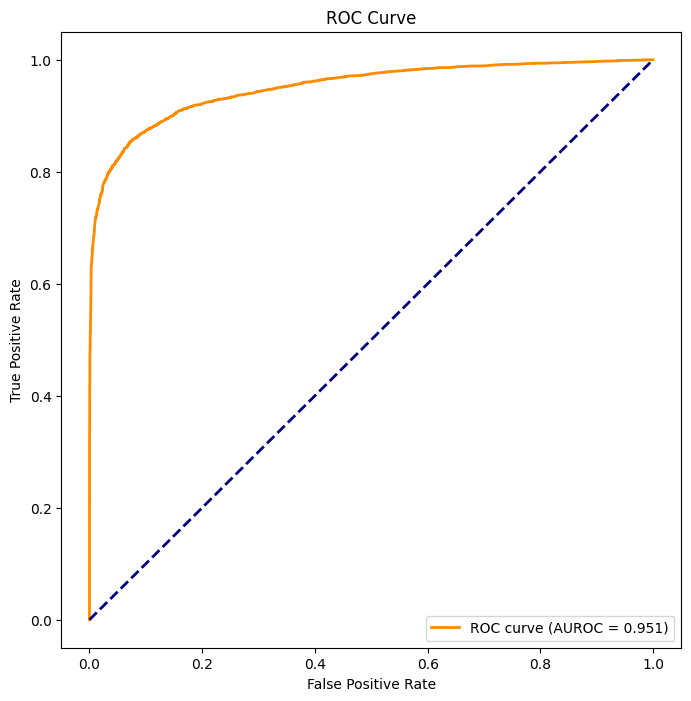

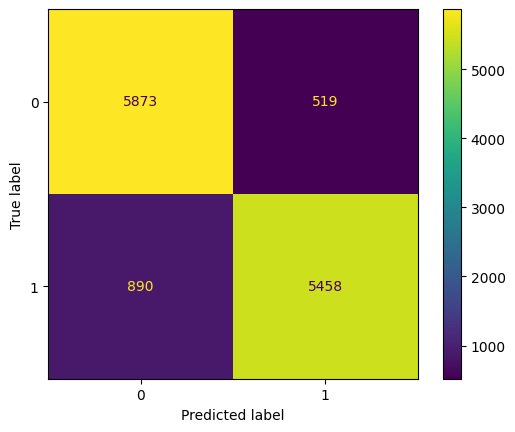

In [49]:
# Predict probabilities instead of binary predictions
y_probs = best_gbc.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (example: 0.5 to 0.3)
threshold = 0.5
y_pred_adjusted = (y_probs > threshold).astype(int)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Visualize ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display the confusion matrix with the adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_true=y_test, y_pred=y_pred_adjusted)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adjusted).plot()

### 6.3.2  Hyperparameter Tuning - XGBoostClassifier

In [50]:
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define AUROC scorer
auroc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    scoring=auroc_scorer,
    cv=10,  # Adjust cross-validation as needed
    n_iter=20,  # Adjust the number of iterations
    n_jobs=-1,
    verbose=1
)

# Fit the RandomizedSearchCV object to the data
random_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters
print("Best hyperparameters for XGBoostClassifier:")
print(random_search_xgb.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters for XGBoostClassifier:
{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}


In [51]:
# Initialize XGBoostClassifier with best hyperparameters
best_xgb = XGBClassifier(
    n_estimators=50,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model on the entire training dataset
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [52]:
# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the model using relevant metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)

Accuracy: 0.8884615384615384
Precision: 0.9101048776427502
Recall: 0.8612161310649024
F1 Score: 0.8849858356940511
AUROC: 0.8883677651569818


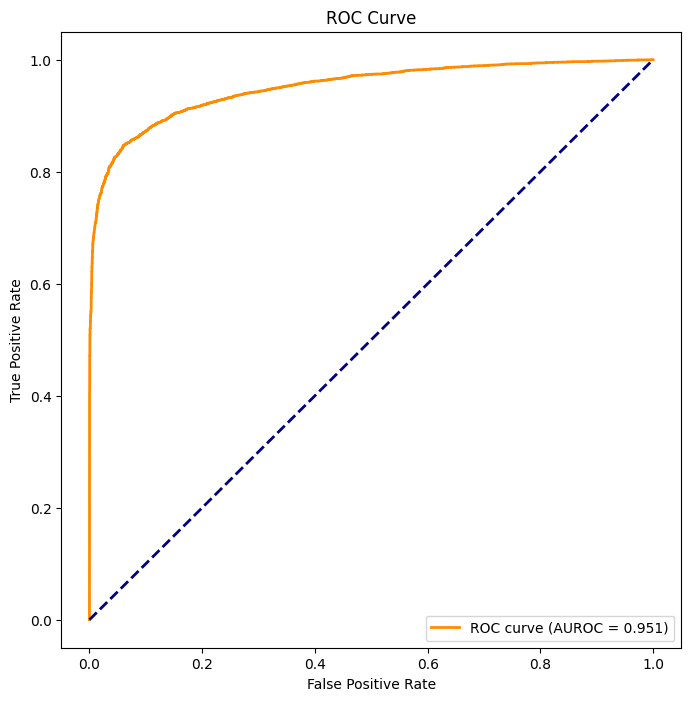

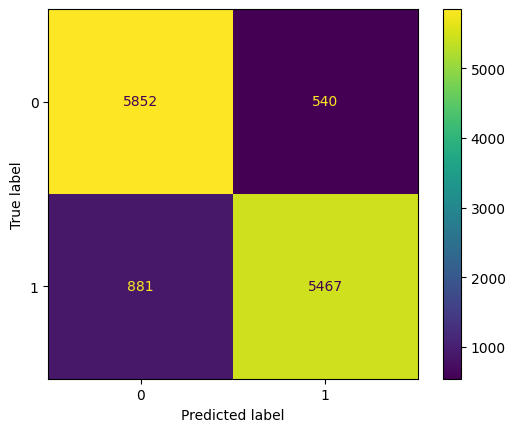

In [53]:
# Predict probabilities instead of binary predictions
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (example: 0.5 to 0.3)
threshold = 0.5
y_pred_adjusted = (y_probs > threshold).astype(int)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Visualize ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display the confusion matrix with the adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_true=y_test, y_pred=y_pred_adjusted)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adjusted).plot()

### 6.3.3 Hyperparameter Tuning - RandomForestClassifier

In [54]:
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define AUROC scorer
auroc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    scoring=auroc_scorer,
    cv=10,  # Adjust cross-validation as needed
    n_iter=20,  # Adjust the number of iterations
    n_jobs=-1,
    verbose=1
)

# Fit the RandomizedSearchCV object to the data
random_search_rf.fit(X_train, y_train)

# Display the best hyperparameters
print("Best hyperparameters for RandomForestClassifier:")
print(random_search_rf.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters for RandomForestClassifier:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}


In [55]:
# Initialize RandomForestClassifier with best hyperparameters
best_rf= RandomForestClassifier(
    n_estimators=200,
    min_samples_split= 2,
    min_samples_leaf= 4,
    max_depth=None,
    bootstrap= False,
    random_state=42
)

# Train the model on the entire training dataset
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [56]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model using relevant metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)

Accuracy: 0.8821821036106751
Precision: 0.9163373990723244
Recall: 0.8402646502835539
F1 Score: 0.8766537924233709
AUROC: 0.8820378320253814


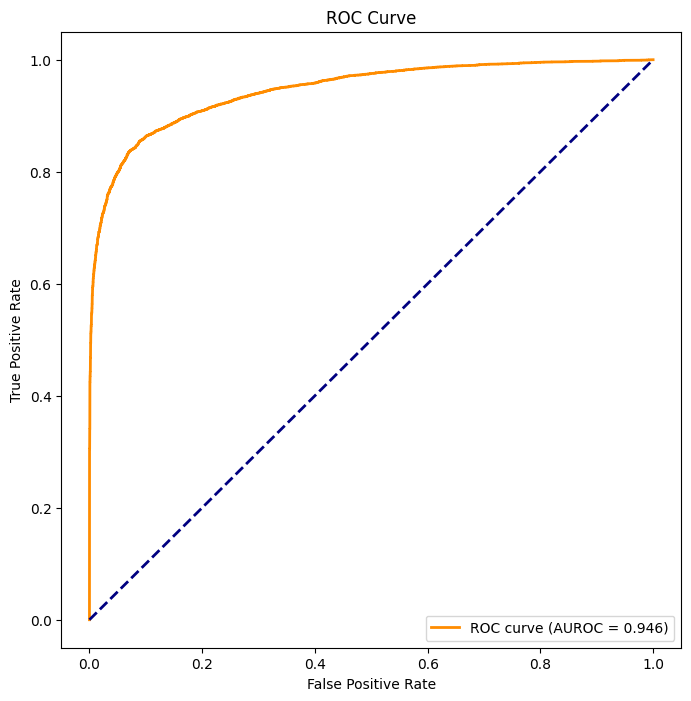

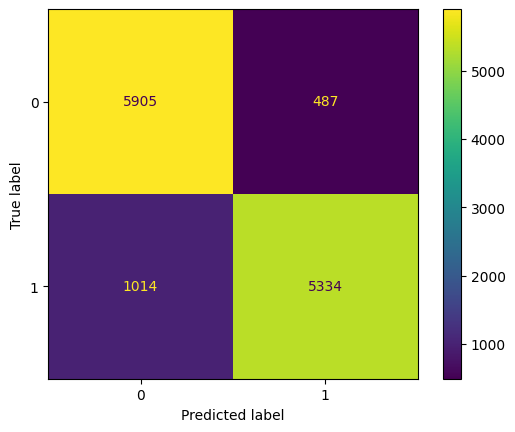

In [57]:
# Predict probabilities instead of binary predictions
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (example: 0.5 to 0.3)
threshold = 0.5
y_pred_adjusted = (y_probs > threshold).astype(int)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Visualize ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display the confusion matrix with the adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_true=y_test, y_pred=y_pred_adjusted)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adjusted).plot()